<a href="https://colab.research.google.com/github/loraran/data_portfolio/blob/main/sales_conversion_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Analysis: **Sales Conversion Optimization**

### **Etapa 1 - Entendimento do Problema**

**Conteúdo:** O dataset utilizado nesse projeto é referente a uma campanha de publicidade em mídias sociais de uma organização anônima (XYZ).

**Objetivo:** Melhorar a conversão de vendas da empresa a partir da análise de campanhas realizadas no Facebook.

**Dataset:** https://www.kaggle.com/loveall/clicks-conversion-tracking

##### Importando bibliotecas de interesse:

In [38]:
# Importação e Manipulação do .CSV
import pandas as pd

# Visualização dos Dados
import missingno   # https://github.com/ResidentMario/missingno
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### **Etapa 2 - Análise, Interpretação e Visualização de Dados**

#### **Primeira inspeção:**

##### **Carregando o dataset:**

In [39]:
# Criando uma variável que recebe o dataframe
df = pd.read_csv("KAG_conversion_data.csv")
type(df)

pandas.core.frame.DataFrame

In [40]:
df.head() # 5 primeiras linhas do dataframe (default)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [41]:
df.tail() # 5 últimas linhas do dataframe (default)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2
1142,1314415,1178,179982,45-49,F,114,513161,114,165.609999,5,2


In [42]:
df.columns # Lista todas as colunas do dataframe

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion'],
      dtype='object')

In [43]:
df.shape # tuple

(1143, 11)

In [44]:
linhas, colunas = df.shape # Número de linhas e colunas do dataframe
print(f'Número de linhas: {linhas}')
print(f'Número de colunas: {colunas}')

Número de linhas: 1143
Número de colunas: 11


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


Observações:
- Nota-se que esse dataframe é um conjunto sem dados faltantes - ou seja, todas as colunas (_features_) possuem valores para cada uma das 1143 linhas do dataframe.
- Conforme o esperado, as únicas features compostas por dados do tipo _object_ são as de idade (pois estão categorizadas como intervalos) e gênero.

##### **Dicionário de Dados:**

Padronizando o nome das colunas para melhor entendimento e manipulação dos dados:

In [46]:
df.rename(columns={"ad_id":"id_anuncio", "xyz_campaign_id":"id_campanha", "fb_campaign_id":"id_fb_campanha", "age":"idade", "gender":"genero", "interest":"interesse", "Impressions":"numero_exibicoes", "Clicks":"cliques", "Spent":"valor_pago_anuncio", "Total_Conversion":"conversao", "Approved_Conversion":"compras"}, inplace = True)

Temos, portanto, o dicionário:

- **id_anuncio**: ID única de cada anúncio.
- **id_campanha**: ID associada a cada anúncio da empresa XYZ.
- **id_fb_campanha**: ID associada a como o Facebook identifica cada campanha.
- **idade**: idade da pessoa a qual o anúncio é entregue.
- **genero**: gênero da pessoa a qual o anúncio é entregue (M - masculino, F - feminino).
- **interesse**: um código que especifica a categoria de interesse da pessoa (conforme mencionado no perfil público da pessoa dentro do Facebook).
- **numero_exibicoes**: o número de vezes que o anúncio foi exibido.
- **cliques**: número de cliques no anúncio.
- **valor_pago_anuncio**: quantia paga ao Facebook (pela empresa XYZ) pela exibição do anúncio.
- **conversao**: Número total de pessoas que perguntaram sobre o produto após visualizar do anúncio.
- **compras**: Número total de pessoas que compraram o produto após visualizar o anúncio.

##### **Informações estatísticas:**

Informações estatísticas gerais sobre o nosso dataframe:

In [47]:
df.describe(exclude = ['O']) # exclude = 'O' exclui informações para dados não-numéricos.

,id_anuncio,id_campanha,id_fb_campanha,interesse,numero_exibicoes,cliques,valor_pago_anuncio,conversao,compras
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


É importante ressaltar que as features _id_anuncio_, _id_campanha_, _id_fb_campanha_ e _interesse_ não são relevantes para realização de análise estatística, por serem identificadores.

A avaliação estatística só possui relevância para as features _numero_exibicoes_, _cliques_, _valor_pago_anuncio_, _conversao_ e _compras_.

In [48]:
df.describe(include = ['O']) # include = 'O' limita o método às features compostas por strings.

,idade,genero
count,1143,1143
unique,4,2
top,30-34,M
freq,426,592


##### **Dados faltantes:**

Como já foi possível notar pela primeira inspeção, esse dataframe não possui dados faltantes.

De qualquer forma, podemos confirmar e documentar essa informação por outros meios:

In [49]:
df.isnull()

,id_anuncio,id_campanha,id_fb_campanha,idade,genero,interesse,numero_exibicoes,cliques,valor_pago_anuncio,conversao,compras
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1138,False,False,False,False,False,False,False,False,False,False,False
1139,False,False,False,False,False,False,False,False,False,False,False
1140,False,False,False,False,False,False,False,False,False,False,False
1141,False,False,False,False,False,False,False,False,False,False,False


Verificando todo o dataframe por meio de contagem:

In [50]:
df.isnull().sum()

id_anuncio            0
id_campanha           0
id_fb_campanha        0
idade                 0
genero                0
interesse             0
numero_exibicoes      0
cliques               0
valor_pago_anuncio    0
conversao             0
compras               0
dtype: int64

Verificando por meio de visualização:

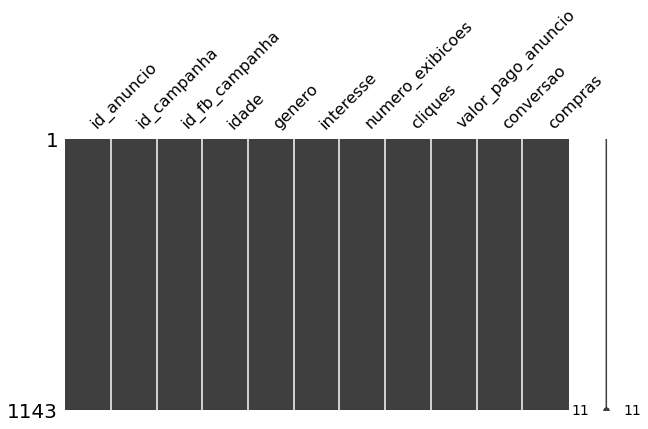

In [51]:
missingno.matrix(df, figsize = (10,5))

##### **Verificação de outliers (valores discrepantes):**

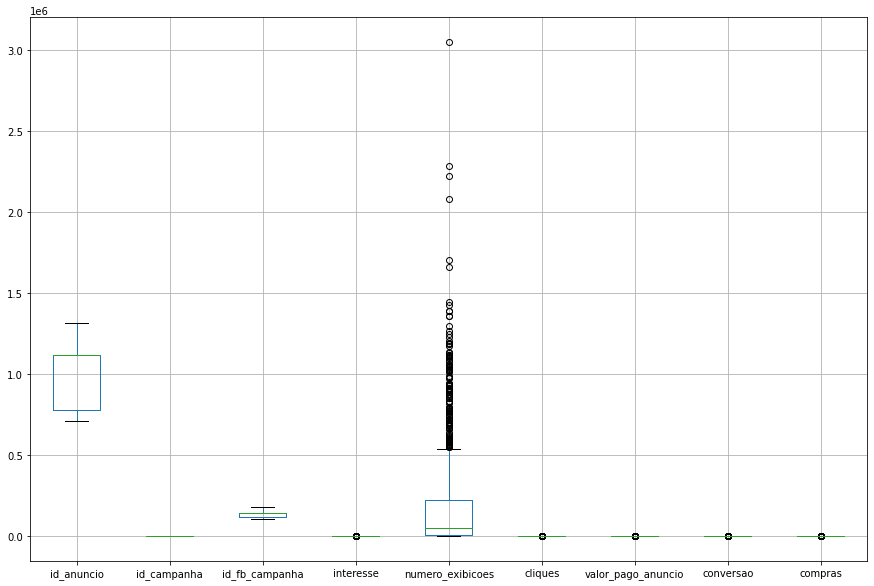

In [52]:
plt.figure(figsize = (15,10))
df.boxplot()
plt.show()

##### **Duplicatas:**

In [53]:
df[df.duplicated()]

,id_anuncio,id_campanha,id_fb_campanha,idade,genero,interesse,numero_exibicoes,cliques,valor_pago_anuncio,conversao,compras


In [54]:
len(df.duplicated())

1143

Vemos, portanto, que não há dados duplicados no nosso dataframe.

##### **Matrizes de Correlação:**

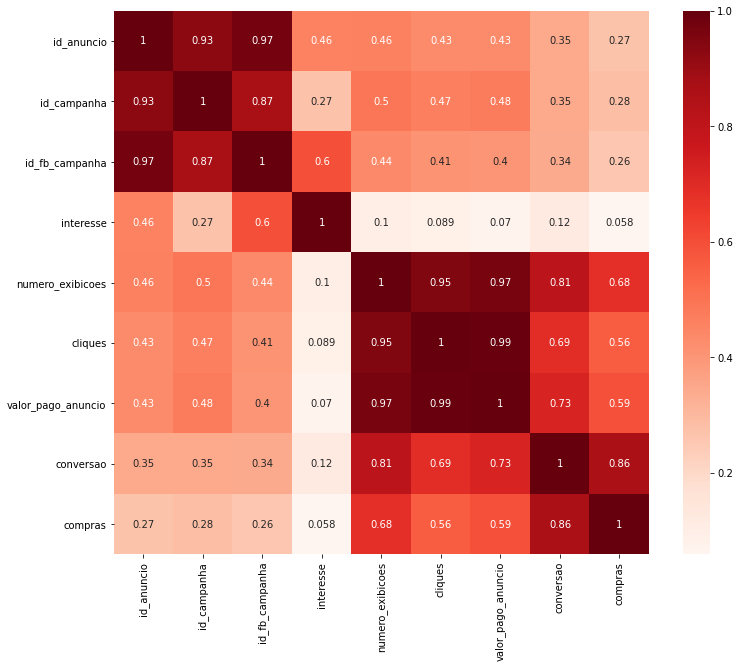

In [55]:
plt.figure(figsize = (12,10))
corr_matrix = df.corr() # salvando a correlação em uma variável para criarmos o heatmap a seguir
sns.heatmap(corr_matrix, annot = True, cmap = plt.cm.Reds)
plt.show()

#### **Avaliação de _features_ (colunas)**

##### 1. _**id_campanha**_ - ID associada a cada anúncio da empresa XYZ

In [56]:
# Número de IDs distintas especificadas no dataframe
df["id_campanha"].nunique()

3

In [57]:
# Listagem de todas as IDs distintas presentes no dataframe
df["id_campanha"].unique()

array([ 916,  936, 1178])

Nosso dataframe, portanto, consiste em dados referentes à realização de **três** campanhas de publicidade distintas.

Vamos renomear os valores únicos de cada campanha para facilitar a leitura e entendimento dos dados. Teremos:

- *ID 916: "campanha_1"*
- *ID 936: "campanha_2"*
- *ID 1178: "campanha_3"*

In [58]:
df["id_campanha"].replace({916:"campanha_1", 936:"campanha_2", 1178:"campanha_3"}, inplace = True)

In [59]:
df.head()

,id_anuncio,id_campanha,id_fb_campanha,idade,genero,interesse,numero_exibicoes,cliques,valor_pago_anuncio,conversao,compras
0,708746,campanha_1,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,campanha_1,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,campanha_1,103920,30-34,M,20,693,0,0.00,1,0
3,708815,campanha_1,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,campanha_1,103928,30-34,M,28,4133,1,1.29,1,1


In [60]:
df.tail()

,id_anuncio,id_campanha,id_fb_campanha,idade,genero,interesse,numero_exibicoes,cliques,valor_pago_anuncio,conversao,compras
1138,1314410,campanha_3,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,campanha_3,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,campanha_3,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,campanha_3,179981,45-49,F,113,790253,135,198.710000,8,2
1142,1314415,campanha_3,179982,45-49,F,114,513161,114,165.609999,5,2


Verificando o número de anúncios veiculados por cada campanha (instâncias de cada campanha no dataframe):

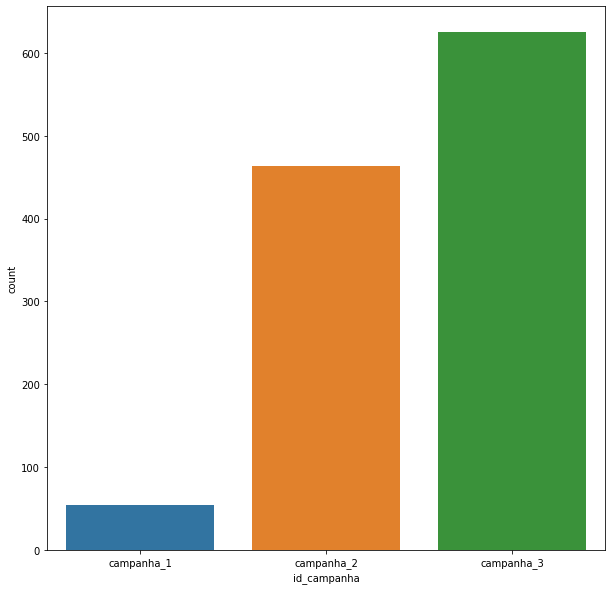

In [61]:
plt.figure(figsize = (10,10))
sns.countplot(x = "id_campanha", data = df)
plt.show()

Podemos observar que *campanha_3* possui um maior número de anúncios veiculados.

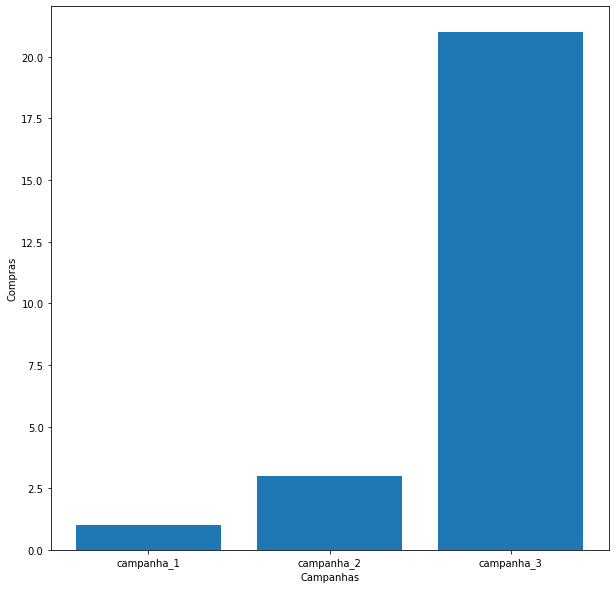

In [62]:
plt.figure(figsize = (10,10))
plt.bar(df["id_campanha"], df["compras"])
plt.ylabel("Compras")
plt.xlabel("Campanhas")
plt.show()

De fato, o maior número de anúncios veiculados pela *campanha_3* aparentemente se reflete em um maior número de conversão em compras. Porém, precisamos observar a relação entre outras features para estabelecer melhor qual é a influência sobre a taxa de conversão em cada campanha veiculada.

##### 2. _**idade**_ - idade da pessoa a qual o anúncio é entregue.

O dataframe apresenta a idade das pessoas em intervalos.

In [63]:
df["idade"].nunique()

4

In [64]:
df["idade"].unique()

array(['30-34', '35-39', '40-44', '45-49'], dtype=object)

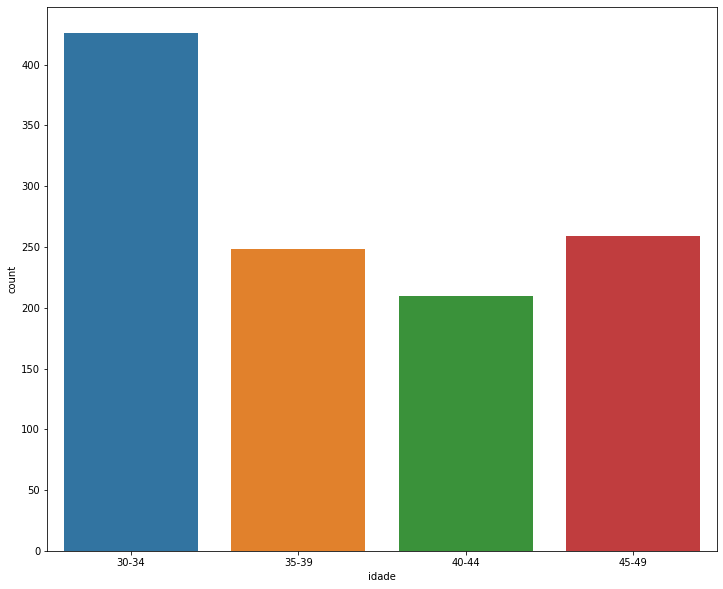

In [65]:
plt.figure(figsize = (12,10))
sns.countplot(x = "idade", data = df)
plt.show()

O público mais presente na veiculação das campanhas é na faixa de 30-34 anos, seguido das faixas de 45-49 anos e 35-39, que estão em patamares similares.

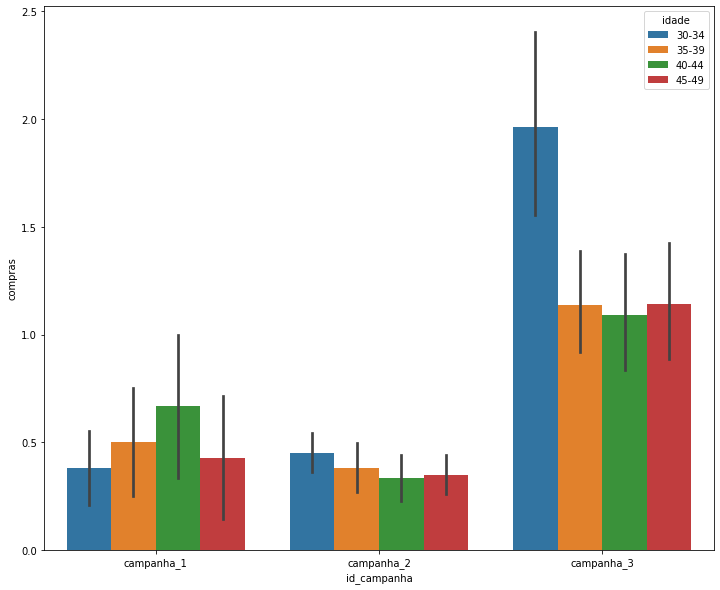

In [66]:
plt.figure(figsize = (12,10))
tips = sns.load_dataset("tips")
sns.barplot(x = df["id_campanha"], y = df["compras"], hue = df["idade"], data = tips)
plt.show()

A faixa etária de 30-34 anos é o público que demonstra mais interesse nas campanhas *campanha_2* e *campanha_3*.

Já a *campanha_1* tem a faixa de 40-44 anos como público mais interessado.

##### 3. _**genero**_ - gênero da pessoa a qual o anúncio é entregue.

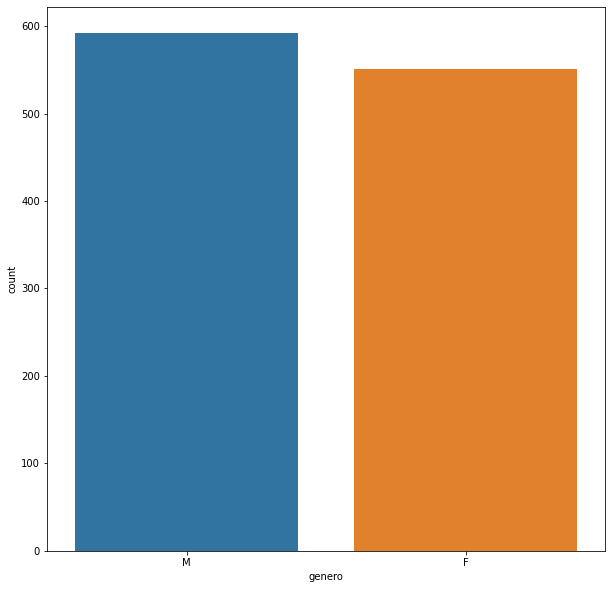

In [67]:
plt.figure(figsize = (10,10))
sns.countplot(x = "genero", data = df)
plt.show()

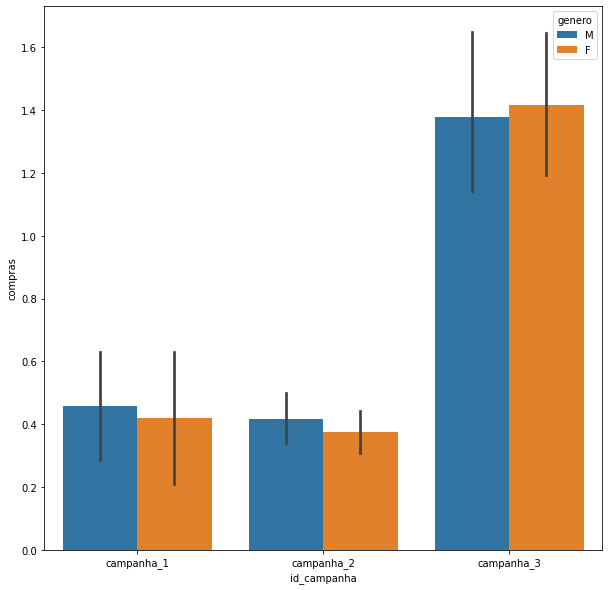

In [68]:
plt.figure(figsize=(10,10))
tips = sns.load_dataset("tips")
sns.barplot(x = df["id_campanha"], y = df["compras"], hue = df["genero"], data = tips)
plt.show()

A proporção entre homens e mulheres é similar para todas as campanhas veiculadas.

##### 4. _**interesse**_ - gênero da pessoa a qual o anúncio é entregue.

In [69]:
# Número de categorias de interesse distintas especificadas no dataframe
df["interesse"].nunique()

40

In [70]:
# Listagem de todas as categorias de interesse distintas presentes no dataframe
df["interesse"].unique()

array([ 15,  16,  20,  28,  29,  27,  31,   7,  30,  24,  21,  32,  18,
        63,  65,  25,  10,  19,  26,  36,  23,  64,  22,   2,  66, 100,
       101, 102, 103, 105, 107, 110, 111, 112, 113, 108, 109, 114, 104,
       106])

Não sabendo quais categorias integram a lista que obtemos, não podemos fazer análises por segmento ou sub-tipo.

Verificando a presença de cada categoria de anúncio (quantas vezes cada categoria aparece no dataframe) e sua respectiva performance (número de conversão em compras):

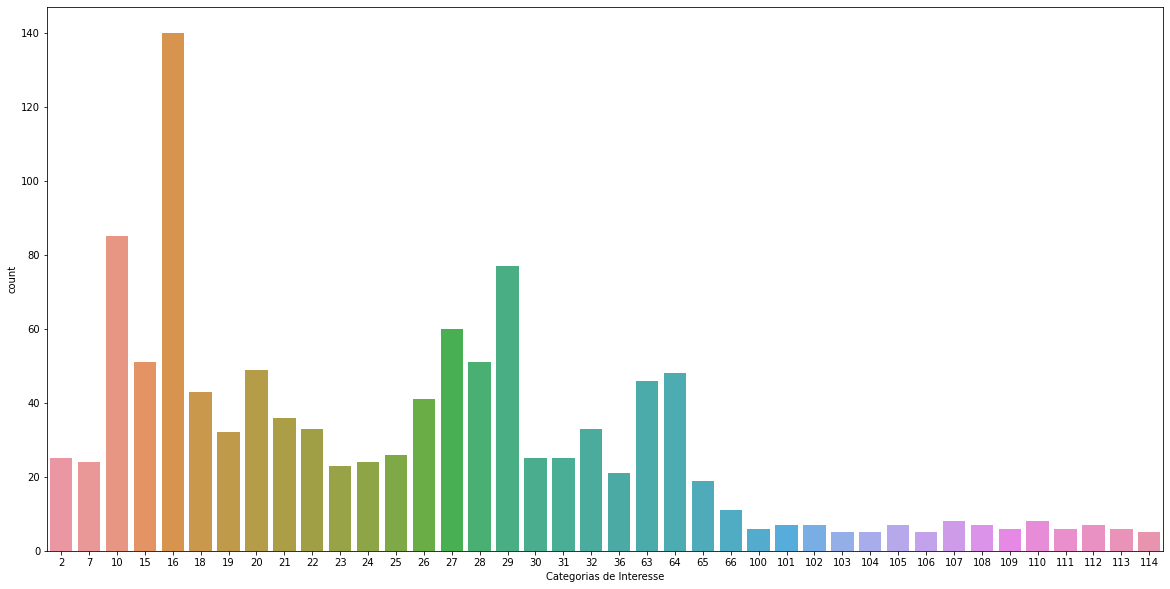

In [71]:
plt.figure(figsize = (20,10))
sns.countplot(x = "interesse", data = df)
plt.xlabel("Categorias de Interesse")
plt.show()

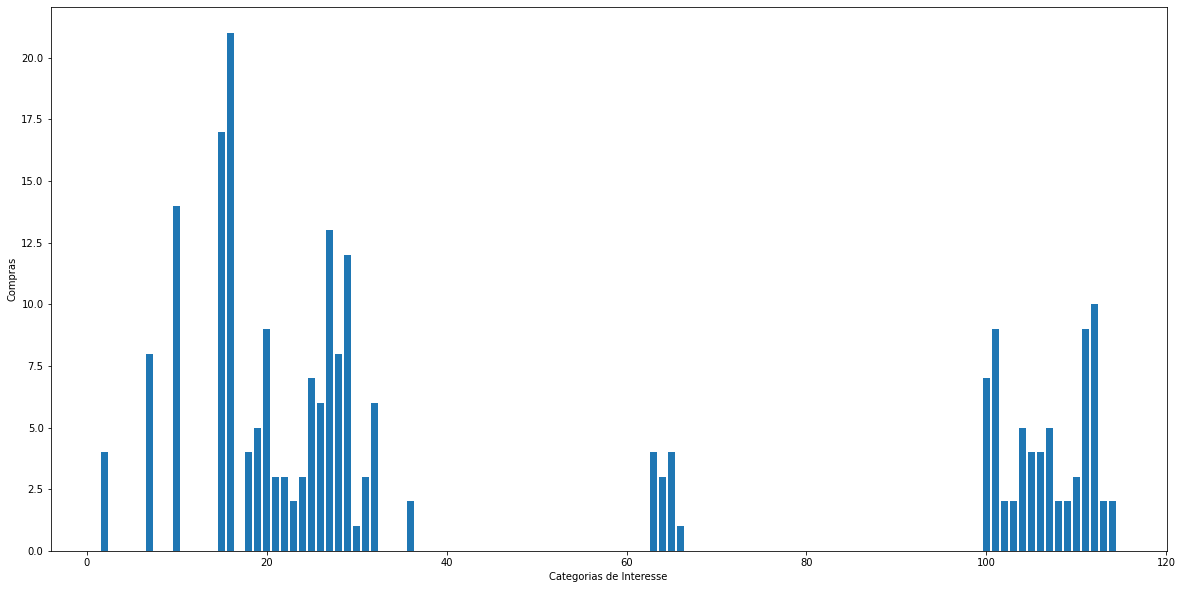

In [72]:
plt.figure(figsize = (20,10))
plt.bar(df["interesse"], df["compras"])
plt.ylabel("Compras")
plt.xlabel("Categorias de Interesse")
plt.show()

### **Etapa 3 - Modelagem / Inteligência Artificial**

Utilizaremos uma amostra do nosso dataframe para visualizar, preliminarmente, a relação entre o valor pago por cada anúncio e o número de cliques:

In [ ]:
amostra_df = df.sample(n = 20)

In [ ]:
amostra_df.shape

In [ ]:
sns.pairplot(amostra_df, x_vars = ["cliques"], y_vars = ["valor_pago_anuncio"], height = 4, kind = "scatter")
plt.show()

Observamos que há uma relação linear - quanto maior o valor pago pelo anúncio, maior o número de cliques. Isso faz sentido, uma vez que um maior valor pago gera maior entrega do anúncio aos clientes.

In [ ]:
sns.pairplot(df, x_vars = ["cliques"], y_vars = ["valor_pago_anuncio"], height = 4, kind = "scatter")
plt.show()

Substituindo os valores de tipo objeto por valores numéricos:

In [ ]:
df = df.replace(['30-34','35-39','40-44','45-49'],[0.1, 0.2, 0.3, 0.4])

In [ ]:
df = df.replace(['M','F'],[0,1])

In [ ]:
df.head()

In [ ]:
df.tail()

Faremos uma regressão linear para verificar a relação entre o valor pago por anúncio (*valor_pago_anuncio*) e as variáveis *idade*, *genero*, *interesse*, *numero_exibicoes* e *cliques*.

Separando o nosso dataframe em conjuntos de dados para treinamento (70%) e teste (30% - test_size = 0.3) do modelo de IA...

In [ ]:
X = df[['idade', 'genero', 'interesse', 'numero_exibicoes', 'cliques']]

In [ ]:
y = df['valor_pago_anuncio']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 32)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

Criando nossa variável que receberá o modelo de regressão linear:

In [ ]:
model = LinearRegression() # y = aX + b

In [ ]:
model

In [ ]:
model.fit(X_train, y_train)

In [ ]:
model.coef_

In [ ]:
model.intercept_

In [ ]:
model.score(X_test, y_test) * 100

O coeficiente de determinação R² da predição é de 99.49%.

### **Etapa 4 - Predição para Campanhas no Facebook**

In [ ]:
df.head()

In [ ]:
df.tail()

Recebendo input do usuário:

In [ ]:
idade = int(input("Idade (entre 30-49): "))
while idade < 30 or idade > 49:
  idade = int(input("Idade (entre 30-49): "))
if idade in [30,31,32,33,34]:
  idade = 0.1
elif idade in [35,36,37,38,39]:
  idade = 0.2
elif idade in [40,41,42,43,44]:
  idade = 0.3
else:
  idade = 0.4

genero = input("Gênero (M/F): ")
while genero not in ['M','m','F','f']:
  genero = input("Gênero (M/F): ")
if genero in ['M','m']:
  genero = 0
elif genero in ['F','f']:
  genero = 1

interesse = int(input("Interesse: "))
numero_exibicoes = int(input("Exibições: "))
cliques_no_anuncio = int(input("Cliques: "))

In [ ]:
pred = model.predict([[idade, genero, interesse, numero_exibicoes, cliques_no_anuncio]])
print(f'Valor estimado para o anúncio: {pred[0]}')